In [49]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn import preprocessing
import statsmodels.api as sm

In [2]:
pd.set_option('display.max_columns',100)

## Reading the Dataset:

In [3]:
df=pd.read_csv(r'C:\Users\LENOVO\Desktop\USL Final\USL_DATASET\Country-data.csv')
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [4]:
df.shape

(167, 10)

### there are 167 rows and 10 columns

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [6]:
cat_cols=list(df.select_dtypes(include=['object']).columns)
print('Cat_cols :',cat_cols)
print()
num_cols=list(df.select_dtypes(include=['float64','int64']).columns)
print('Num_cols :',num_cols)
print()

Cat_cols : ['country']

Num_cols : ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']



In [7]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [8]:
df.max()

country       Zambia
child_mort       208
exports          200
health          17.9
imports          174
income        125000
inflation        104
life_expec      82.8
total_fer       7.49
gdpp          105000
dtype: object

In [9]:
df.min()

country       Afghanistan
child_mort            2.6
exports             0.109
health               1.81
imports            0.0659
income                609
inflation           -4.21
life_expec           32.1
total_fer            1.15
gdpp                  231
dtype: object

In [10]:
df.median()

child_mort      19.30
exports         35.00
health           6.32
imports         43.30
income        9960.00
inflation        5.39
life_expec      73.10
total_fer        2.41
gdpp          4660.00
dtype: float64

In [11]:
df.quantile(.25)

child_mort       8.250
exports         23.800
health           4.920
imports         30.200
income        3355.000
inflation        1.810
life_expec      65.300
total_fer        1.795
gdpp          1330.000
Name: 0.25, dtype: float64

In [12]:
df.quantile(.75)

child_mort       62.10
exports          51.35
health            8.60
imports          58.75
income        22800.00
inflation        10.75
life_expec       76.80
total_fer         3.88
gdpp          14050.00
Name: 0.75, dtype: float64

In [14]:
df.describe(include='object')

,country
count,167
unique,167
top,Lebanon
freq,1


In [21]:
a=df.shape
a

(167, 10)

In [18]:
for i in df.columns:
    t = df[i].value_counts().index
    t = t.sort_values()
    for j in t:
        print("percentage of ",j,end = "")
        f = (df[i].value_counts()[j]/a[0])*100
        print(" in " ,i,end = "")
        print(" column is",f)
    print()

percentage of  Afghanistan in  country column is 0.5988023952095809
percentage of  Albania in  country column is 0.5988023952095809
percentage of  Algeria in  country column is 0.5988023952095809
percentage of  Angola in  country column is 0.5988023952095809
percentage of  Antigua and Barbuda in  country column is 0.5988023952095809
percentage of  Argentina in  country column is 0.5988023952095809
percentage of  Armenia in  country column is 0.5988023952095809
percentage of  Australia in  country column is 0.5988023952095809
percentage of  Austria in  country column is 0.5988023952095809
percentage of  Azerbaijan in  country column is 0.5988023952095809
percentage of  Bahamas in  country column is 0.5988023952095809
percentage of  Bahrain in  country column is 0.5988023952095809
percentage of  Bangladesh in  country column is 0.5988023952095809
percentage of  Barbados in  country column is 0.5988023952095809
percentage of  Belarus in  country column is 0.5988023952095809
percentage of 

percentage of  United Arab Emirates in  country column is 0.5988023952095809
percentage of  United Kingdom in  country column is 0.5988023952095809
percentage of  United States in  country column is 0.5988023952095809
percentage of  Uruguay in  country column is 0.5988023952095809
percentage of  Uzbekistan in  country column is 0.5988023952095809
percentage of  Vanuatu in  country column is 0.5988023952095809
percentage of  Venezuela in  country column is 0.5988023952095809
percentage of  Vietnam in  country column is 0.5988023952095809
percentage of  Yemen in  country column is 0.5988023952095809
percentage of  Zambia in  country column is 0.5988023952095809

percentage of  2.6 in  child_mort column is 0.5988023952095809
percentage of  2.8 in  child_mort column is 1.1976047904191618
percentage of  3.0 in  child_mort column is 1.1976047904191618
percentage of  3.2 in  child_mort column is 1.7964071856287425
percentage of  3.4 in  child_mort column is 0.5988023952095809
percentage of  3

percentage of  10.0 in  exports column is 0.5988023952095809
percentage of  10.7 in  exports column is 0.5988023952095809
percentage of  11.8 in  exports column is 0.5988023952095809
percentage of  12.0 in  exports column is 0.5988023952095809
percentage of  12.4 in  exports column is 1.1976047904191618
percentage of  13.3 in  exports column is 0.5988023952095809
percentage of  13.5 in  exports column is 0.5988023952095809
percentage of  14.9 in  exports column is 1.1976047904191618
percentage of  15.0 in  exports column is 0.5988023952095809
percentage of  15.3 in  exports column is 0.5988023952095809
percentage of  15.9 in  exports column is 0.5988023952095809
percentage of  16.0 in  exports column is 0.5988023952095809
percentage of  16.5 in  exports column is 0.5988023952095809
percentage of  16.8 in  exports column is 0.5988023952095809
percentage of  17.1 in  exports column is 0.5988023952095809
percentage of  18.7 in  exports column is 0.5988023952095809
percentage of  18.9 in  

percentage of  4.17 in  health column is 0.5988023952095809
percentage of  4.29 in  health column is 1.1976047904191618
percentage of  4.39 in  health column is 0.5988023952095809
percentage of  4.4 in  health column is 0.5988023952095809
percentage of  4.41 in  health column is 0.5988023952095809
percentage of  4.47 in  health column is 1.1976047904191618
percentage of  4.48 in  health column is 0.5988023952095809
percentage of  4.51 in  health column is 0.5988023952095809
percentage of  4.53 in  health column is 0.5988023952095809
percentage of  4.66 in  health column is 0.5988023952095809
percentage of  4.75 in  health column is 0.5988023952095809
percentage of  4.81 in  health column is 0.5988023952095809
percentage of  4.84 in  health column is 0.5988023952095809
percentage of  4.86 in  health column is 0.5988023952095809
percentage of  4.91 in  health column is 0.5988023952095809
percentage of  4.93 in  health column is 0.5988023952095809
percentage of  4.97 in  health column is 

percentage of  31.3 in  imports column is 0.5988023952095809
percentage of  31.4 in  imports column is 0.5988023952095809
percentage of  32.4 in  imports column is 0.5988023952095809
percentage of  32.9 in  imports column is 0.5988023952095809
percentage of  33.0 in  imports column is 0.5988023952095809
percentage of  33.3 in  imports column is 0.5988023952095809
percentage of  33.6 in  imports column is 0.5988023952095809
percentage of  34.1 in  imports column is 0.5988023952095809
percentage of  34.3 in  imports column is 0.5988023952095809
percentage of  34.4 in  imports column is 0.5988023952095809
percentage of  34.5 in  imports column is 0.5988023952095809
percentage of  34.9 in  imports column is 0.5988023952095809
percentage of  35.0 in  imports column is 0.5988023952095809
percentage of  35.1 in  imports column is 0.5988023952095809
percentage of  35.2 in  imports column is 0.5988023952095809
percentage of  36.3 in  imports column is 0.5988023952095809
percentage of  36.4 in  

percentage of  4480 in  income column is 0.5988023952095809
percentage of  4490 in  income column is 0.5988023952095809
percentage of  4980 in  income column is 0.5988023952095809
percentage of  5150 in  income column is 0.5988023952095809
percentage of  5190 in  income column is 0.5988023952095809
percentage of  5400 in  income column is 0.5988023952095809
percentage of  5410 in  income column is 0.5988023952095809
percentage of  5600 in  income column is 0.5988023952095809
percentage of  5830 in  income column is 0.5988023952095809
percentage of  5840 in  income column is 0.5988023952095809
percentage of  5900 in  income column is 0.5988023952095809
percentage of  6420 in  income column is 0.5988023952095809
percentage of  6440 in  income column is 0.5988023952095809
percentage of  6700 in  income column is 0.5988023952095809
percentage of  6710 in  income column is 0.5988023952095809
percentage of  6730 in  income column is 0.5988023952095809
percentage of  7290 in  income column is

percentage of  3.86 in  inflation column is 0.5988023952095809
percentage of  3.87 in  inflation column is 0.5988023952095809
percentage of  4.08 in  inflation column is 0.5988023952095809
percentage of  4.15 in  inflation column is 0.5988023952095809
percentage of  4.22 in  inflation column is 0.5988023952095809
percentage of  4.23 in  inflation column is 0.5988023952095809
percentage of  4.3 in  inflation column is 0.5988023952095809
percentage of  4.37 in  inflation column is 0.5988023952095809
percentage of  4.44 in  inflation column is 0.5988023952095809
percentage of  4.49 in  inflation column is 0.5988023952095809
percentage of  4.91 in  inflation column is 0.5988023952095809
percentage of  5.14 in  inflation column is 0.5988023952095809
percentage of  5.39 in  inflation column is 0.5988023952095809
percentage of  5.44 in  inflation column is 0.5988023952095809
percentage of  5.45 in  inflation column is 0.5988023952095809
percentage of  5.47 in  inflation column is 1.1976047904

percentage of  75.8 in  life_expec column is 1.1976047904191618
percentage of  76.0 in  life_expec column is 1.1976047904191618
percentage of  76.1 in  life_expec column is 1.1976047904191618
percentage of  76.3 in  life_expec column is 1.7964071856287425
percentage of  76.4 in  life_expec column is 1.7964071856287425
percentage of  76.5 in  life_expec column is 1.1976047904191618
percentage of  76.6 in  life_expec column is 0.5988023952095809
percentage of  76.7 in  life_expec column is 1.1976047904191618
percentage of  76.8 in  life_expec column is 1.1976047904191618
percentage of  76.9 in  life_expec column is 0.5988023952095809
percentage of  77.1 in  life_expec column is 0.5988023952095809
percentage of  77.5 in  life_expec column is 0.5988023952095809
percentage of  77.8 in  life_expec column is 0.5988023952095809
percentage of  77.9 in  life_expec column is 1.1976047904191618
percentage of  78.2 in  life_expec column is 1.1976047904191618
percentage of  78.7 in  life_expec colum

percentage of  5.11 in  total_fer column is 0.5988023952095809
percentage of  5.2 in  total_fer column is 0.5988023952095809
percentage of  5.21 in  total_fer column is 1.1976047904191618
percentage of  5.27 in  total_fer column is 0.5988023952095809
percentage of  5.31 in  total_fer column is 0.5988023952095809
percentage of  5.34 in  total_fer column is 0.5988023952095809
percentage of  5.36 in  total_fer column is 0.5988023952095809
percentage of  5.4 in  total_fer column is 0.5988023952095809
percentage of  5.43 in  total_fer column is 0.5988023952095809
percentage of  5.56 in  total_fer column is 0.5988023952095809
percentage of  5.71 in  total_fer column is 0.5988023952095809
percentage of  5.82 in  total_fer column is 0.5988023952095809
percentage of  5.84 in  total_fer column is 0.5988023952095809
percentage of  5.87 in  total_fer column is 0.5988023952095809
percentage of  6.15 in  total_fer column is 0.5988023952095809
percentage of  6.16 in  total_fer column is 0.59880239520

percentage of  28000 in  gdpp column is 0.5988023952095809
percentage of  30600 in  gdpp column is 0.5988023952095809
percentage of  30700 in  gdpp column is 0.5988023952095809
percentage of  30800 in  gdpp column is 0.5988023952095809
percentage of  33700 in  gdpp column is 0.5988023952095809
percentage of  35000 in  gdpp column is 0.5988023952095809
percentage of  35300 in  gdpp column is 0.5988023952095809
percentage of  35800 in  gdpp column is 0.5988023952095809
percentage of  38500 in  gdpp column is 0.5988023952095809
percentage of  38900 in  gdpp column is 0.5988023952095809
percentage of  40600 in  gdpp column is 0.5988023952095809
percentage of  41800 in  gdpp column is 0.5988023952095809
percentage of  41900 in  gdpp column is 0.5988023952095809
percentage of  44400 in  gdpp column is 0.5988023952095809
percentage of  44500 in  gdpp column is 0.5988023952095809
percentage of  46200 in  gdpp column is 0.5988023952095809
percentage of  46600 in  gdpp column is 0.59880239520958

## Check for Correlation:

In [22]:
df.corr()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
child_mort,1.000000,-0.318093,-0.200402,-0.127211,-0.524315,0.288276,-0.886676,0.848478,-0.483032
exports,-0.318093,1.000000,-0.114408,0.737381,0.516784,-0.107294,0.316313,-0.320011,0.418725
health,-0.200402,-0.114408,1.000000,0.095717,0.129579,-0.255376,0.210692,-0.196674,0.345966
imports,-0.127211,0.737381,0.095717,1.000000,0.122406,-0.246994,0.054391,-0.159048,0.115498
income,-0.524315,0.516784,0.129579,0.122406,1.000000,-0.147756,0.611962,-0.501840,0.895571
inflation,0.288276,-0.107294,-0.255376,-0.246994,-0.147756,1.000000,-0.239705,0.316921,-0.221631
life_expec,-0.886676,0.316313,0.210692,0.054391,0.611962,-0.239705,1.000000,-0.760875,0.600089
total_fer,0.848478,-0.320011,-0.196674,-0.159048,-0.501840,0.316921,-0.760875,1.000000,-0.454910
gdpp,-0.483032,0.418725,0.345966,0.115498,0.895571,-0.221631,0.600089,-0.454910,1.000000


In [23]:
df.cov()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
child_mort,1626.422713,-351.651128,-22.199943,-124.201982,-4.076360e+05,122.893627,-318.008262,51.801162,-3.570463e+05
exports,-351.651128,751.418298,-8.614534,489.350622,2.730946e+05,-31.090078,77.110598,-13.279671,2.103785e+05
health,-22.199943,-8.614534,7.545116,6.365141,6.861669e+03,-7.415093,5.146808,-0.817828,1.741797e+04
imports,-124.201982,489.350622,6.365141,586.104198,5.712872e+04,-63.208898,11.710284,-5.829066,5.125005e+04
income,-407635.982270,273094.598023,6861.669071,57128.721588,3.716439e+08,-30110.122438,104916.785517,-14645.727927,3.164430e+08
inflation,122.893627,-31.090078,-7.415093,-63.208898,-3.011012e+04,111.739781,-22.533965,5.071509,-4.294042e+04
life_expec,-318.008262,77.110598,5.146808,11.710284,1.049168e+05,-22.533965,79.088507,-10.243585,9.781472e+04
total_fer,51.801162,-13.279671,-0.817828,-5.829066,-1.464573e+04,5.071509,-10.243585,2.291734,-1.262233e+04
gdpp,-357046.306154,210378.470377,17417.971217,51250.050217,3.164430e+08,-42940.421636,97814.722603,-12622.333657,3.359414e+08


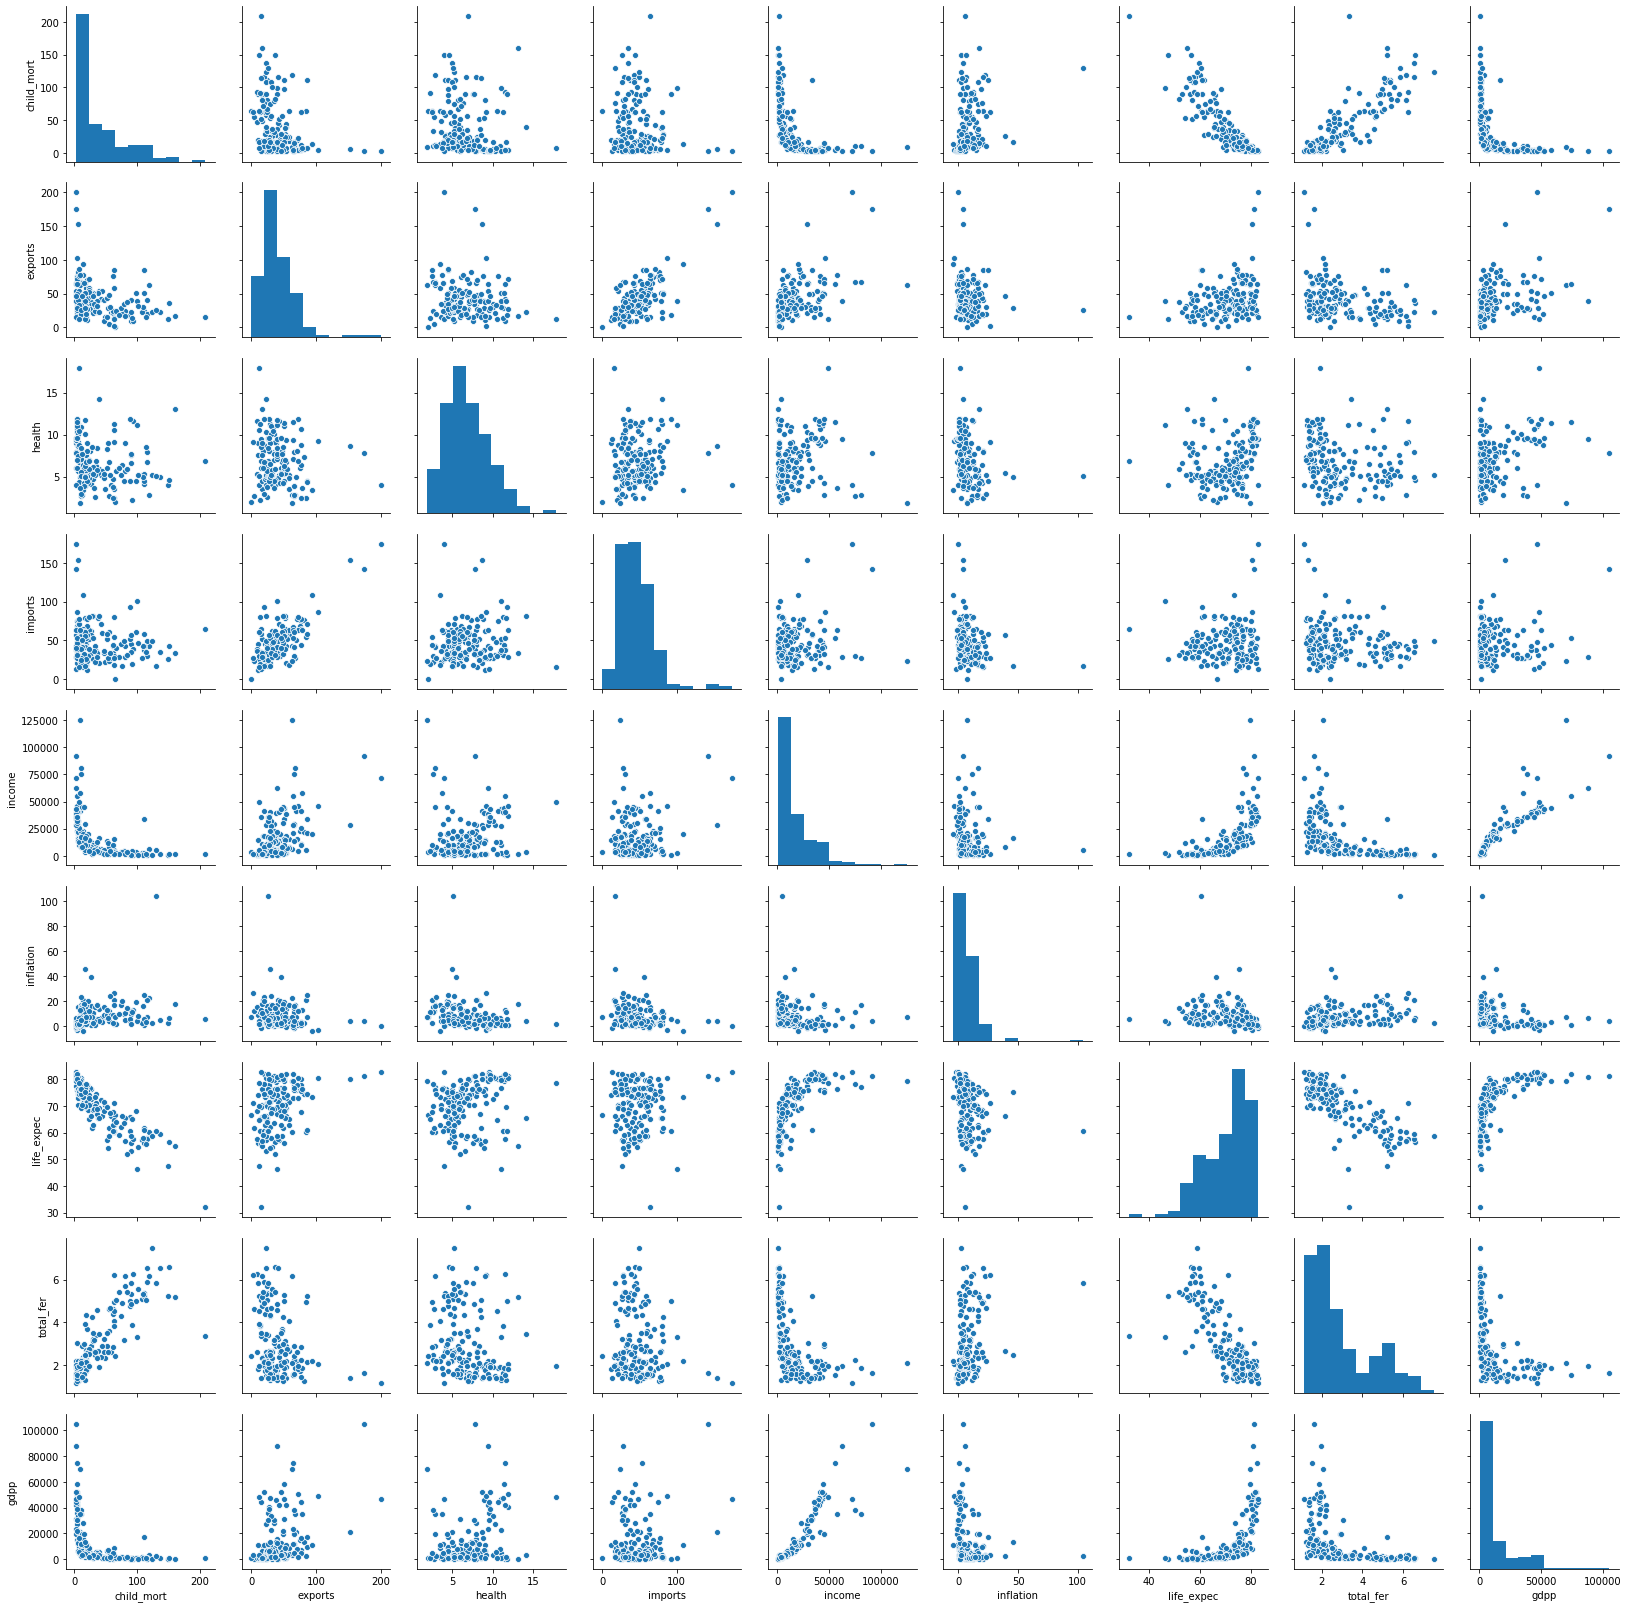

In [24]:
sns.pairplot(df)

### total_fer,life_expec,health comprises the huge volume of variance.

## Check for Null Values: 

In [32]:
df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

### dataset has no null values

### label encoding the country column.

In [27]:
le = preprocessing.LabelEncoder()
df['country']= le.fit_transform(df['country'])

In [28]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [29]:
df1= df.apply(zscore)

In [30]:
df1.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,-1.721710,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-1.700967,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-1.680223,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,-1.659480,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-1.638736,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817


### Incase of many dimensions taken into analysis or many more correlation among variables , when we feel to cut down the variables taken into consideration we can go for PCA,  a dimensionality reduction technique.

## K-Means Clustering: 

The no of clusters could be assumed as 3 - for 3 distinct categories 
countries require more money aid
countries require moderate money aid
and
countries require less money aid

In [81]:
kmeans = KMeans(n_clusters=2, n_init = 15, random_state=100)
kmeans.fit(df1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=15, n_jobs=None, precompute_distances='auto',
       random_state=100, tol=0.0001, verbose=0)

In [82]:
cluster_range = range( 1, 15 )
cluster_errors = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 10 )
  clusters.fit(df1)
  labels = clusters.labels_
  centroids = clusters.cluster_centers_
  cluster_errors.append( clusters.inertia_ )
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df[0:15]


,num_clusters,cluster_errors
0,1,1670.000000
1,2,1216.561275
2,3,998.051610
3,4,866.287690
4,5,785.937295
5,6,737.769648
6,7,647.900577
7,8,590.326010
8,9,553.057109
9,10,519.245597


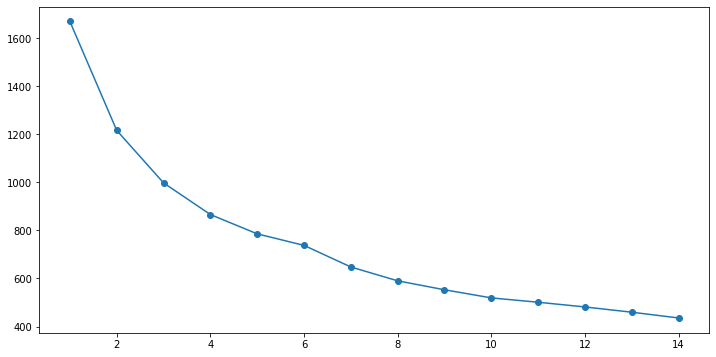

In [83]:
# Elbow plot
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

### As we can see from the above Elbow plot- our assumed cluster size of 3 is correct as the elbow plot  at 3 we attained less inertia. so the no of labels can be 3/2.


In [94]:
kmeans = KMeans(n_clusters=3, n_init = 15, random_state=100)
kmeans.fit(df1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=15, n_jobs=None, precompute_distances='auto',
       random_state=100, tol=0.0001, verbose=0)

In [95]:
centroids = kmeans.cluster_centers_
centroids


array([[-0.02782069, -0.41035291, -0.01905868, -0.22975892,  0.02583178,
        -0.23414538, -0.01734704,  0.25896065, -0.42549251, -0.34533068],
       [-0.03398402,  1.36021776, -0.43753313, -0.15598401, -0.18920377,
        -0.68689408,  0.40211078, -1.28217981,  1.36494385, -0.60424243],
       [ 0.11320022, -0.83000679,  0.63382985,  0.7674502 ,  0.19133932,
         1.49103941, -0.49784881,  1.09287988, -0.79958564,  1.65007148]])

In [96]:
centroid_df = pd.DataFrame(centroids, columns = list(df1))
centroid_df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,-0.027821,-0.410353,-0.019059,-0.229759,0.025832,-0.234145,-0.017347,0.258961,-0.425493,-0.345331
1,-0.033984,1.360218,-0.437533,-0.155984,-0.189204,-0.686894,0.402111,-1.282180,1.364944,-0.604242
2,0.113200,-0.830007,0.633830,0.767450,0.191339,1.491039,-0.497849,1.092880,-0.799586,1.650071


In [97]:
## creating a new dataframe only for labels and converting it into categorical variable
df_labels = pd.DataFrame(kmeans.labels_ , columns = list(['labels']))
df_labels['labels'] = df_labels['labels'].astype('category')

In [98]:
df_labels.head()

,labels
0,1
1,0
2,0
3,1
4,0


0    85
1    47
2    35
dtype: int64


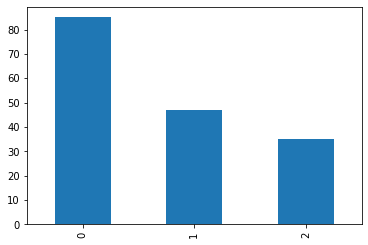

In [99]:
g = pd.Series(kmeans.labels_)
print(g.value_counts())
g.value_counts().plot.bar()

In [100]:
# labels appended to original dataframe
df_labeled = df1.join(df_labels)

In [163]:
df_analysis = (df_labeled.groupby(['labels'] , axis=0))
df_analysis.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,labels
0,-1.721710,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180,1
1,-1.700967,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623,0
2,-1.680223,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376,0
3,-1.659480,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268,1
4,-1.638736,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817,0
5,-1.617993,-0.591177,-0.812628,0.468966,-1.279787,0.080920,1.244725,0.591474,-0.382933,-0.145791,0
6,-1.597249,-0.501643,-0.743107,-0.882089,-0.065883,-0.543421,-0.001123,0.309514,-0.833471,-0.533233,0
7,-1.576506,-0.832423,-0.779697,0.699011,-1.076779,1.261966,-0.628316,1.290735,-0.674457,2.130699,2
8,-1.555762,-0.844858,0.372890,1.527901,0.037693,1.355617,-0.655549,1.121559,-0.999109,1.857082,2
15,-1.410558,-0.839884,1.291301,1.418356,1.152164,1.246357,-0.559999,1.065167,-0.720836,1.720274,2


In [102]:
from mpl_toolkits.mplot3d import Axes3D


Text(0.5, 0.92, '3D plot of KMeans Clustering')

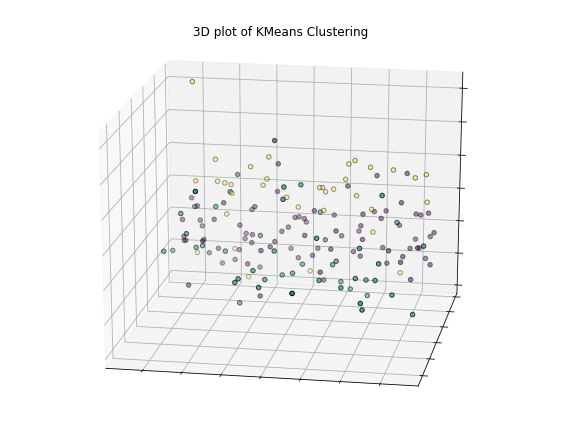

In [103]:
fig = plt.figure(figsize=(8, 6))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=20, azim=100)
kmeans.fit(df1)
labels = kmeans.labels_
ax.scatter(df1.iloc[:, 0], df1.iloc[:, 1], df1.iloc[:, 3],c=labels.astype(np.float), edgecolor='k')
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_title('3D plot of KMeans Clustering')

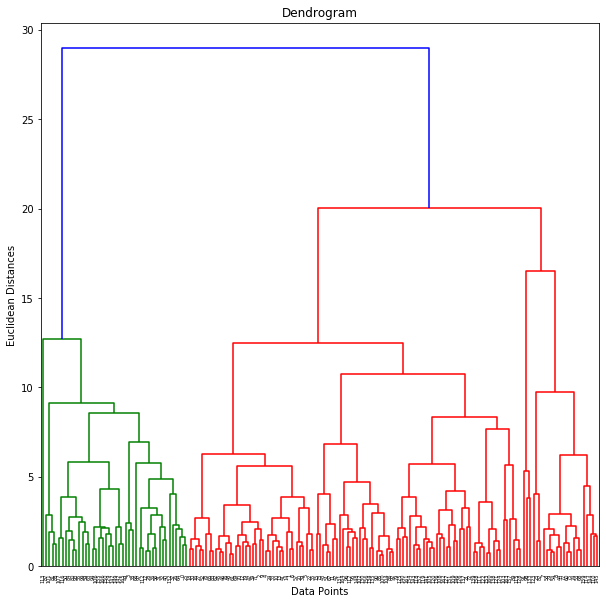

In [105]:
from scipy.cluster.hierarchy import linkage, dendrogram
plt.figure(figsize=[10,10])
merg = linkage(df1, method='ward')
dendrogram(merg, leaf_rotation=90)
plt.title('Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distances')
plt.show()

### from dendogram also we can see that there are 3 different classes.

Automatically created module for IPython interactive environment
For n_clusters = 2 The average silhouette_score is : 0.25223697128320827


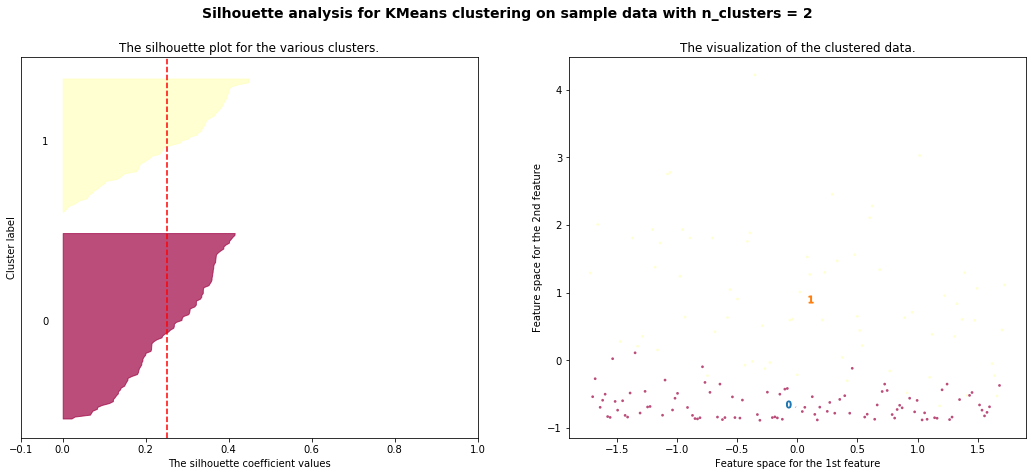

For n_clusters = 3 The average silhouette_score is : 0.24043690533753967


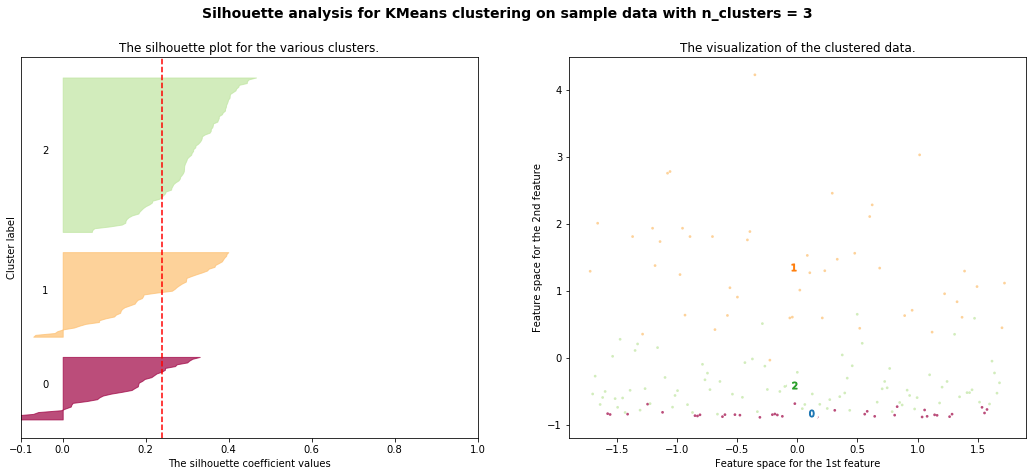

For n_clusters = 4 The average silhouette_score is : 0.25313157179353935


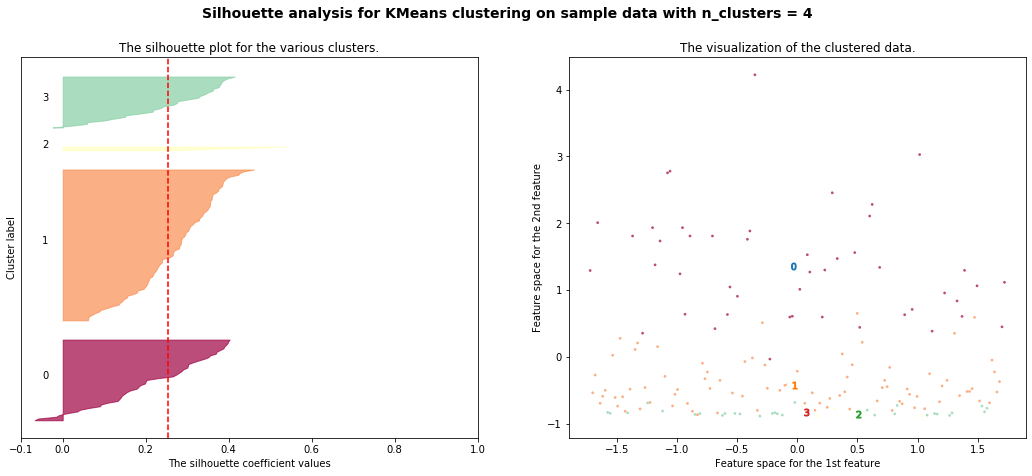

For n_clusters = 5 The average silhouette_score is : 0.20341158655023014


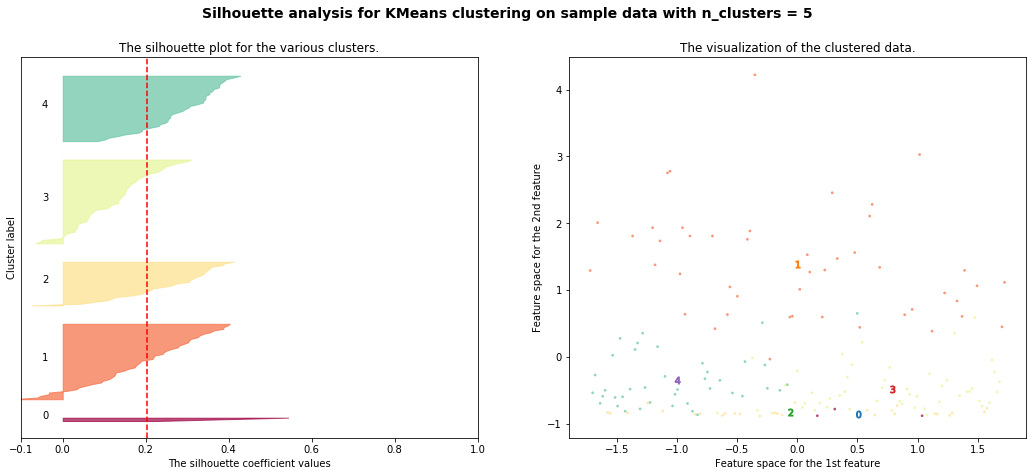

For n_clusters = 6 The average silhouette_score is : 0.21004747675050014


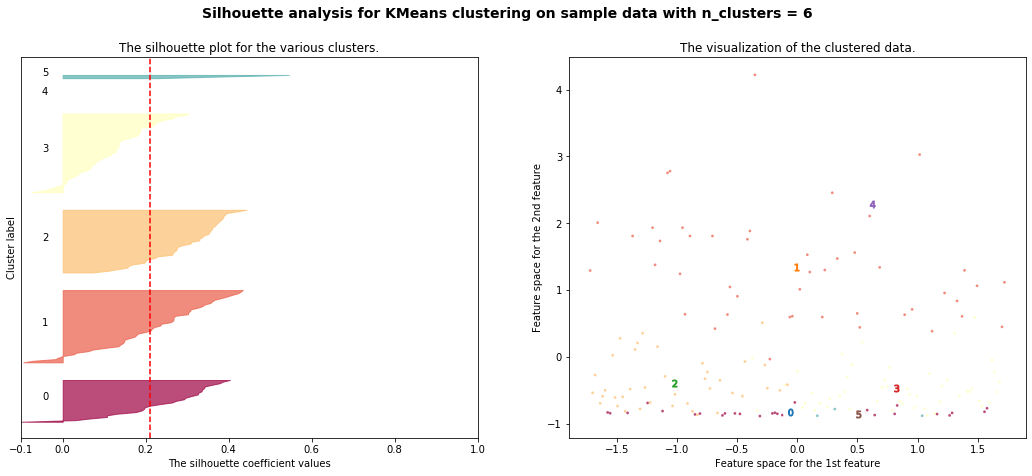

For n_clusters = 7 The average silhouette_score is : 0.19810537514547089


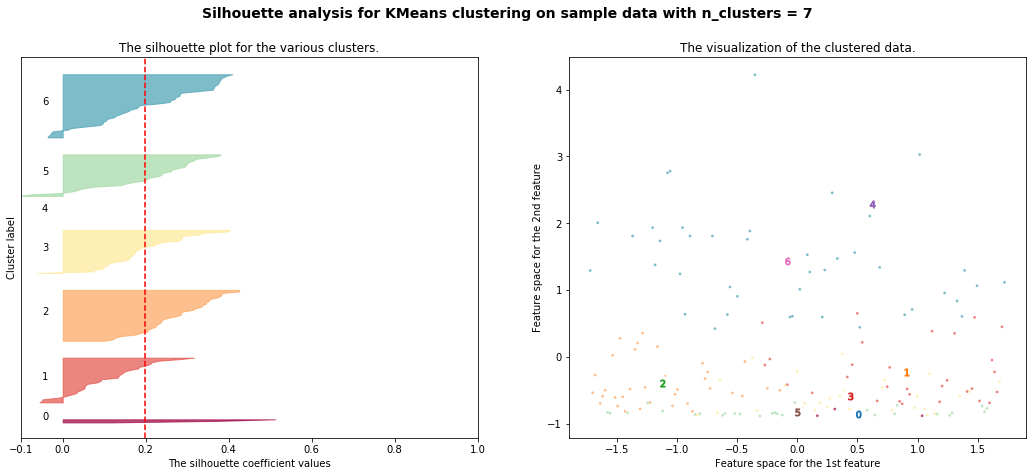

For n_clusters = 8 The average silhouette_score is : 0.21189032495729176


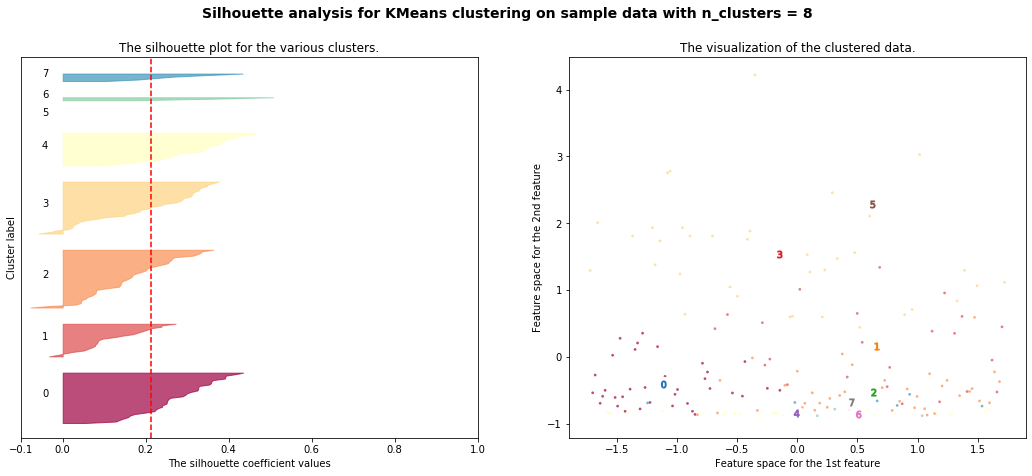

For n_clusters = 9 The average silhouette_score is : 0.2126040764751618


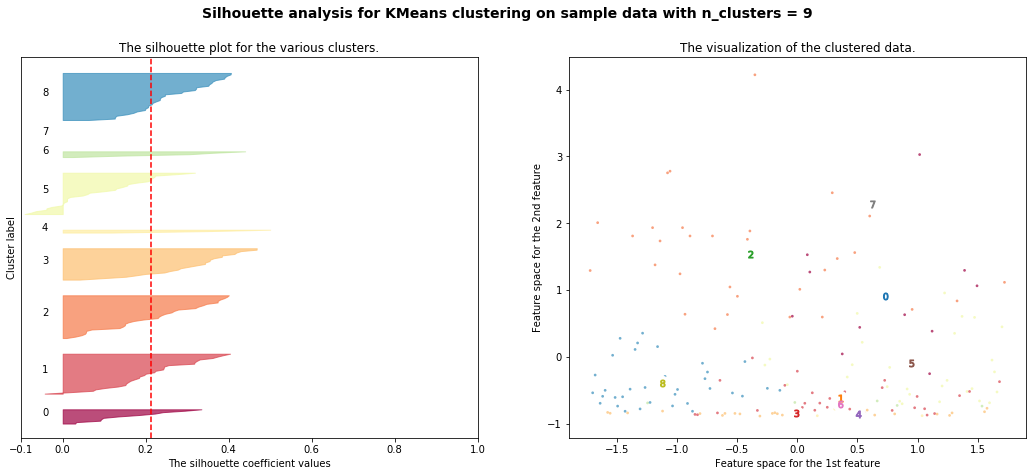

For n_clusters = 10 The average silhouette_score is : 0.19072511849547988


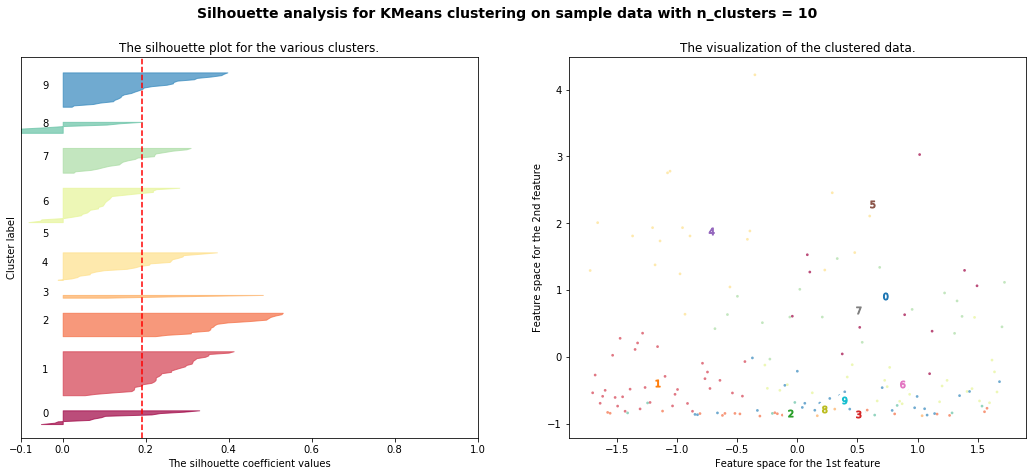

For n_clusters = 11 The average silhouette_score is : 0.19388479876299908


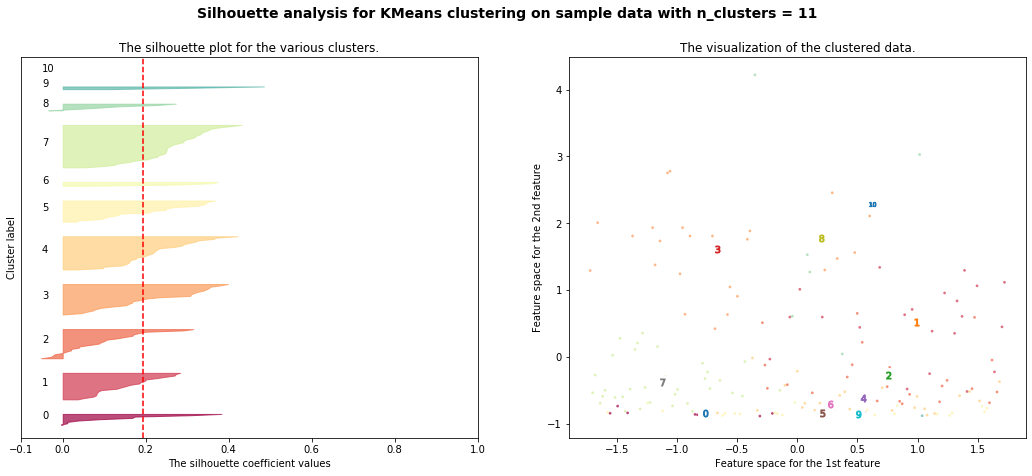

For n_clusters = 12 The average silhouette_score is : 0.19682239537622204


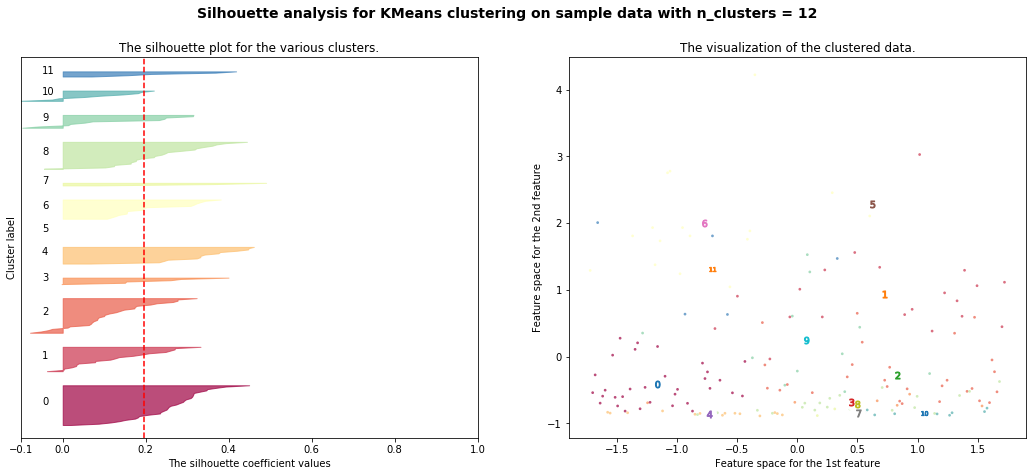

For n_clusters = 13 The average silhouette_score is : 0.19540612408771998


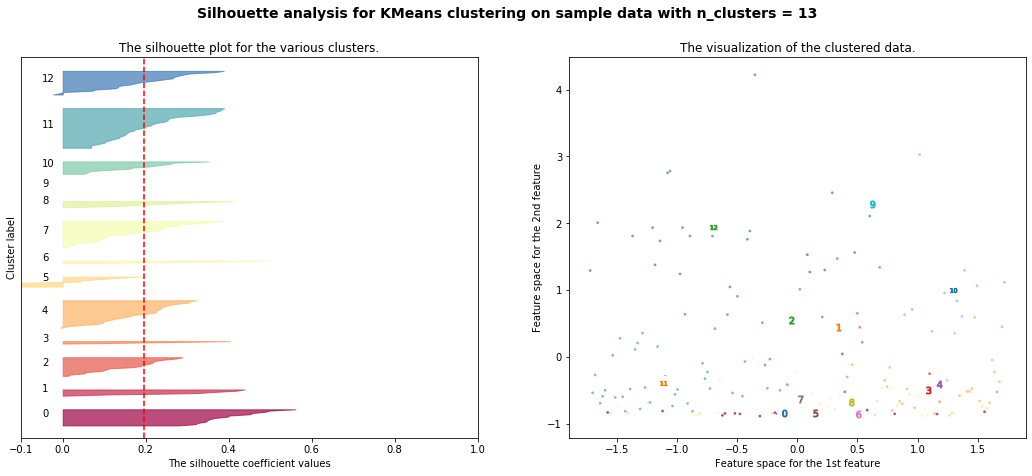

For n_clusters = 14 The average silhouette_score is : 0.17016673795002005


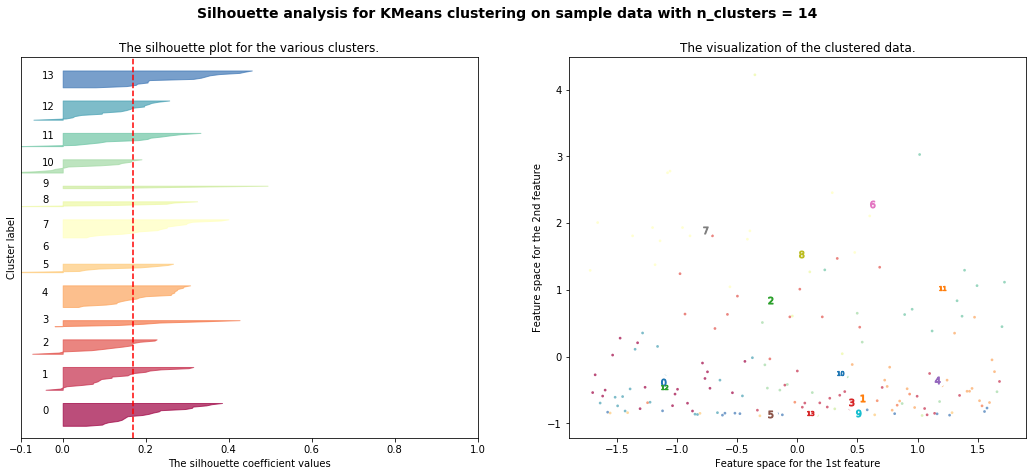

For n_clusters = 15 The average silhouette_score is : 0.17657467926802858


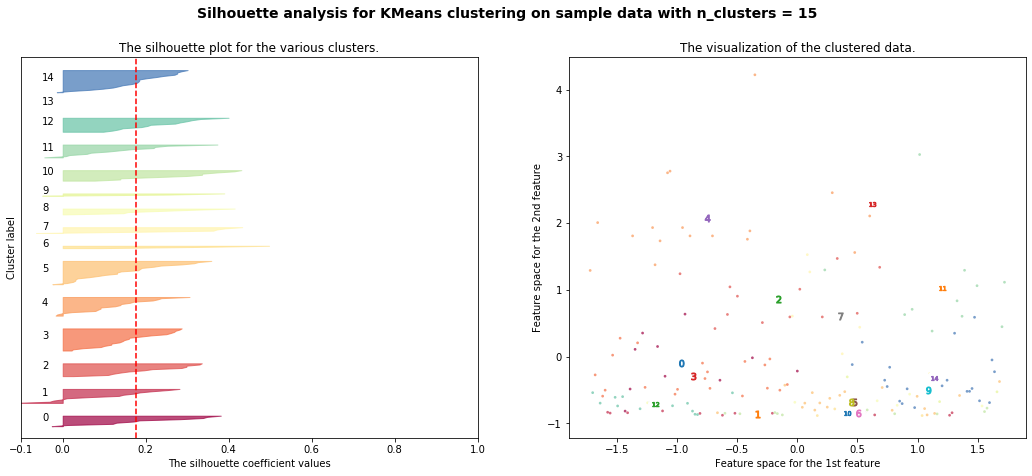

In [107]:
from __future__ import print_function
%matplotlib inline


from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

print(__doc__)

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
X=df1.values

range_n_clusters = [2, 3, 4, 5, 6,7,8,9,10,11,12,13,14,15]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters,n_init=15, random_state=2)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.Spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.Spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors)

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1],
                marker='o', c="white", alpha=1, s=200)

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50)

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()

### from the silhouette graph it is obvious that clusters with 2/3 will be formed and did better clustering for the given data..

## Analysis between Mean of Attribures vs Clusters:

In [110]:
df_analysis.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp', 'labels'],
      dtype='object')

labels
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
2    AxesSubplot(0.125,0.125;0.775x0.755)
Name: country, dtype: object

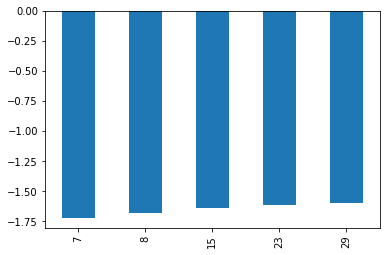

In [121]:
a=df_analysis.groupby('labels')['country']
a.plot(kind='bar')

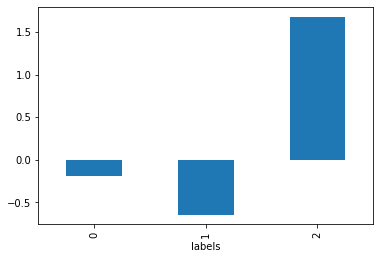

In [115]:
df_analysis.groupby('labels')['income'].mean().plot(kind='bar')

### mean of cluster 2 countries income is higher compared to others so they can be classified under less aid dependent.

### cluster 0 and 1 countries are aid dependent countries.

plot between clusters and country


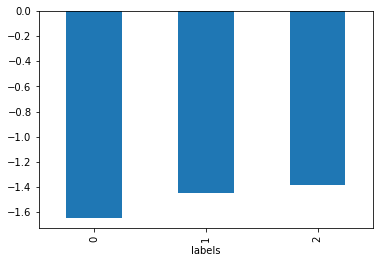

plot between clusters and child_mort


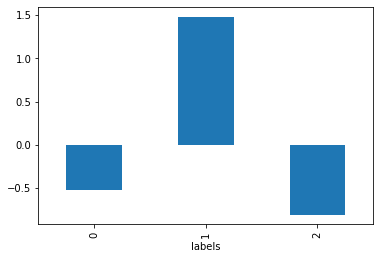

plot between clusters and exports


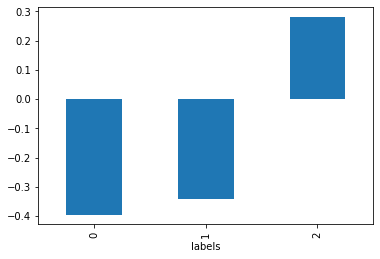

plot between clusters and health


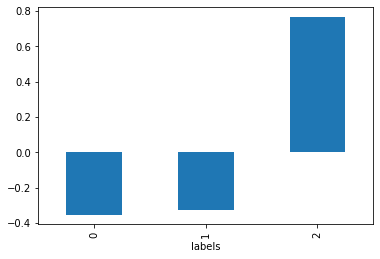

plot between clusters and imports


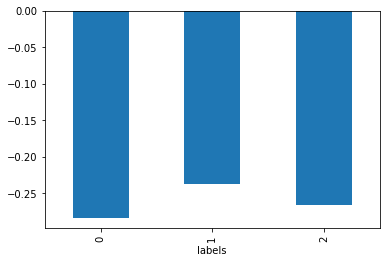

plot between clusters and income


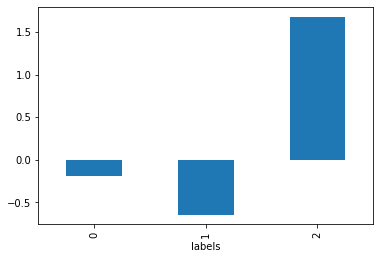

plot between clusters and inflation


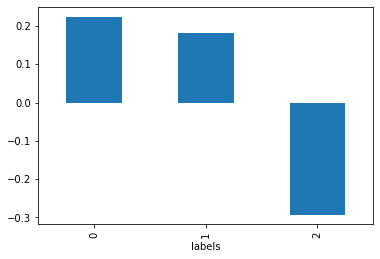

plot between clusters and life_expec


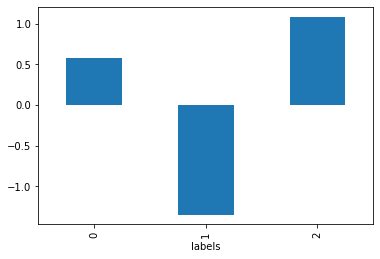

plot between clusters and total_fer


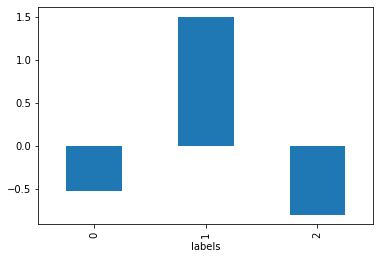

plot between clusters and gdpp


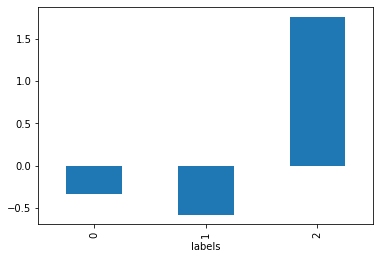

In [124]:
for i in df.columns:
    print('plot between clusters and',i)
    df_analysis.groupby('labels')[i].mean().plot(kind='bar')
    plt.show()                                              
                                                
    
    

### mean of cluster 0 countries are high compared to other two.
### mean of child_mort of cluster 1 countries are high.
### mean of exports of cluster 2 countries are high.
### mean of health of cluster 2 countries are high.
### mean of imports of cluster 0 is high followed by 2 and 1.
### mean of inflation in cluster 2 is very low.
### life_expec mean is very low for cluster 1 countries.
### GDP for cluster 2 is very high compared to others .

## Boxplot between Mean of Attributes vs Clusters:

### CLUSTER 0 Countries

In [130]:
a=df_analysis[df_analysis['labels']==0]
a=a.mean()

box plot for cluster 0 and its country


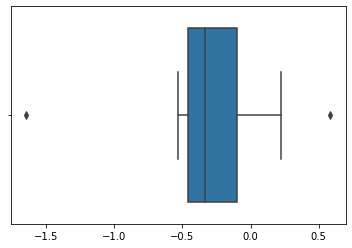

box plot for cluster 0 and its child_mort


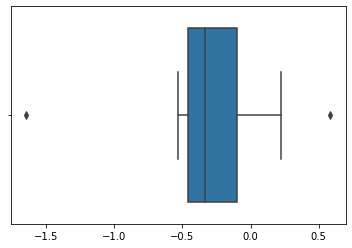

box plot for cluster 0 and its exports


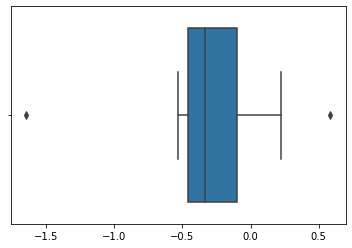

box plot for cluster 0 and its health


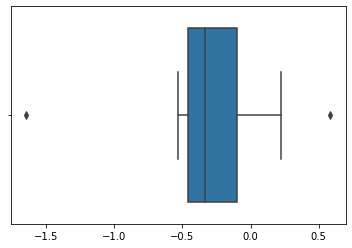

box plot for cluster 0 and its imports


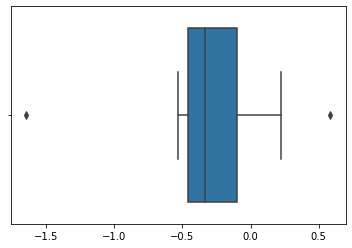

box plot for cluster 0 and its income


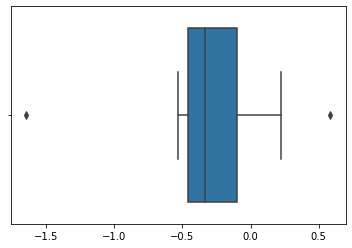

box plot for cluster 0 and its inflation


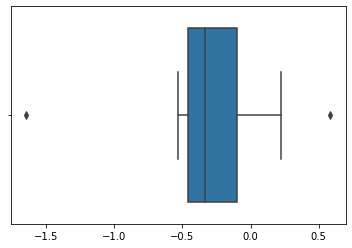

box plot for cluster 0 and its life_expec


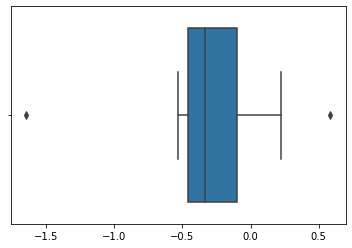

box plot for cluster 0 and its total_fer


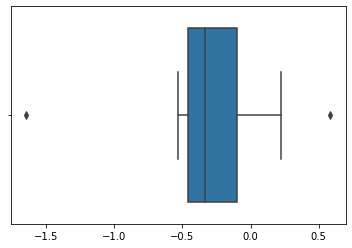

box plot for cluster 0 and its gdpp


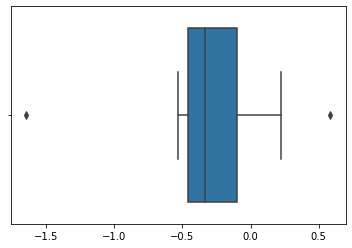

In [132]:
for i in df.columns:
    print('box plot for cluster 0 and its',i)
    sns.boxplot(a)
    plt.show()

### CLUSTER 1 Countries

In [133]:
a=df_analysis[df_analysis['labels']==1]
a=a.mean()

box plot for cluster 0 and its country


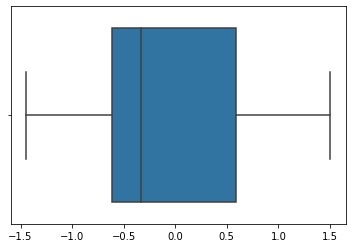

box plot for cluster 0 and its child_mort


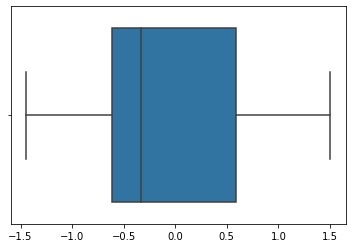

box plot for cluster 0 and its exports


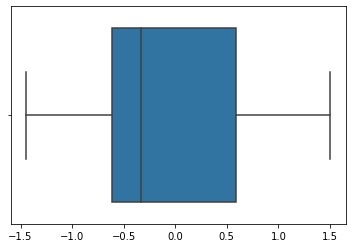

box plot for cluster 0 and its health


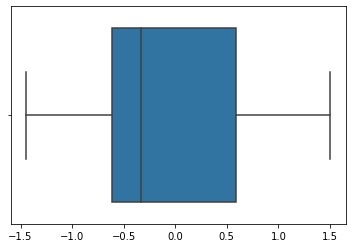

box plot for cluster 0 and its imports


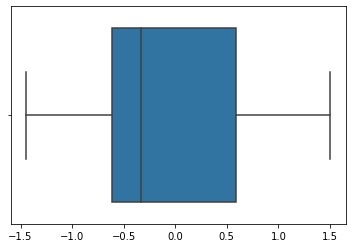

box plot for cluster 0 and its income


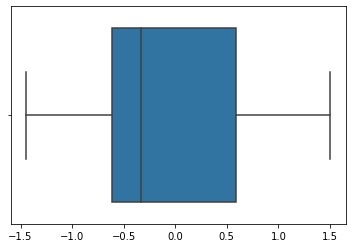

box plot for cluster 0 and its inflation


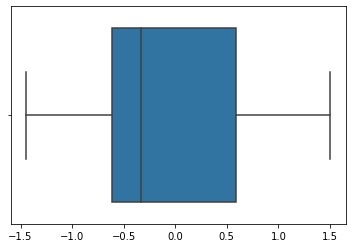

box plot for cluster 0 and its life_expec


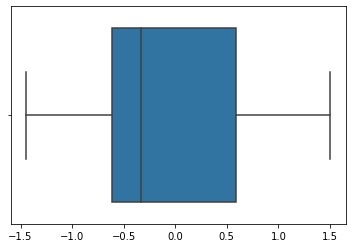

box plot for cluster 0 and its total_fer


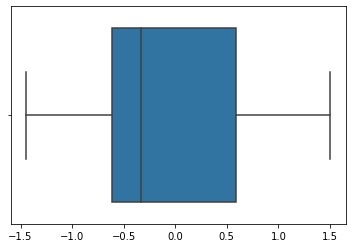

box plot for cluster 0 and its gdpp


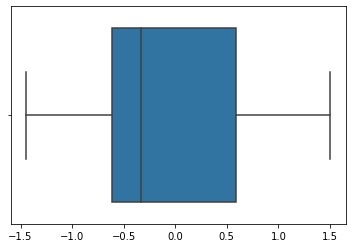

In [134]:
for i in df.columns:
    print('box plot for cluster 0 and its',i)
    sns.boxplot(a)
    plt.show()

### CLUSTER 2 Countries

In [135]:
a=df_analysis[df_analysis['labels']==2]
a=a.mean()

box plot for cluster 0 and its country


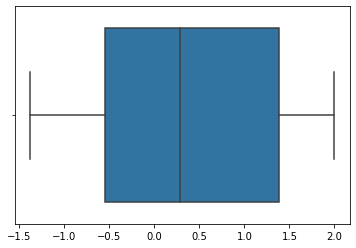

box plot for cluster 0 and its child_mort


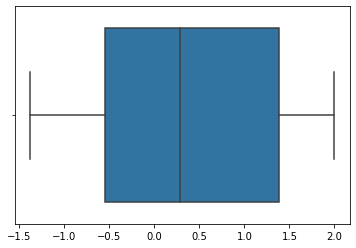

box plot for cluster 0 and its exports


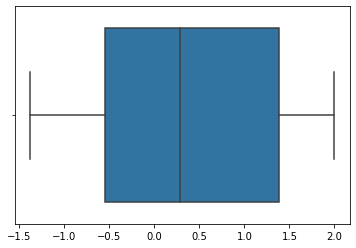

box plot for cluster 0 and its health


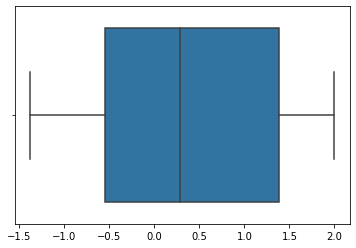

box plot for cluster 0 and its imports


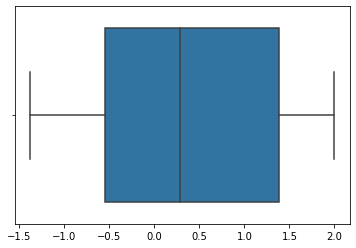

box plot for cluster 0 and its income


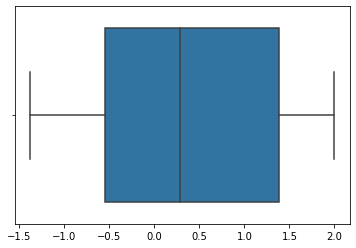

box plot for cluster 0 and its inflation


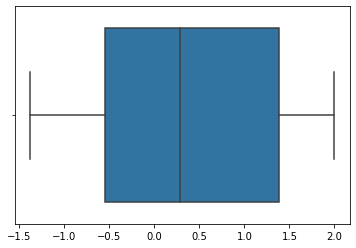

box plot for cluster 0 and its life_expec


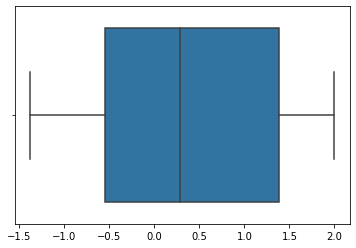

box plot for cluster 0 and its total_fer


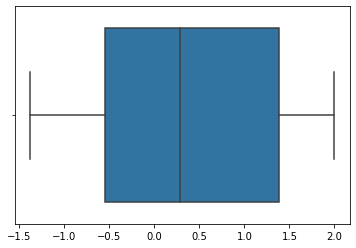

box plot for cluster 0 and its gdpp


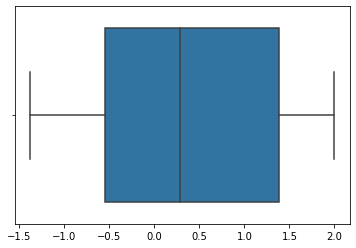

In [136]:
for i in df.columns:
    print('box plot for cluster 0 and its',i)
    sns.boxplot(a)
    plt.show()

### mean of cluster 0 countries are high compared to other two.
### mean of child_mort of cluster 1 countries are high.
### mean of exports of cluster 2 countries are high.
### mean of health of cluster 2 countries are high.
### mean of imports of cluster 0 is high followed by 2 and 1.
### mean of inflation in cluster 2 is very low.
### life_expec mean is very low for cluster 1 countries.
### GDP for cluster 2 is very high compared to others .

## GDP, Child Mortality, Income vs Clusters:

### from the above box plot and bar plot the cluster 0 and 1 countries are very poor in gdp and income.

### cluster 1 countries are high in child-mortality rate.

In [176]:
d=pd.read_csv(r'C:\Users\LENOVO\Desktop\USL Final\USL_DATASET\Country-data.csv')
d.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [181]:
d['labels']=df_labels['labels'].astype('category')

In [143]:
d.head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,labels
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.440,56.2,5.82,553,1
1,Albania,16.6,28.0,6.55,48.6,9930,4.490,76.3,1.65,4090,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.100,76.5,2.89,4460,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.400,60.1,6.16,3530,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200,0
5,Argentina,14.5,18.9,8.10,16.0,18700,20.900,75.8,2.37,10300,0
6,Armenia,18.1,20.8,4.40,45.3,6700,7.770,73.3,1.69,3220,0
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900,2
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900,2
9,Azerbaijan,39.2,54.3,5.88,20.7,16000,13.800,69.1,1.92,5840,0


In [157]:
a=d[d['labels']==0]
a.nunique()

country       85
child_mort    75
exports       80
health        76
imports       84
income        82
inflation     83
life_expec    62
total_fer     73
gdpp          79
labels         1
dtype: int64

In [152]:
cluster0=[]
print("cluster 0 countries are:")
for i in a.country:
    cluster0.append(i)
print(cluster0)

cluster 0 countries are:
['Albania', 'Algeria', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belize', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Cambodia', 'Cape Verde', 'Chile', 'China', 'Colombia', 'Costa Rica', 'Croatia', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Estonia', 'Fiji', 'Georgia', 'Grenada', 'Guatemala', 'Guyana', 'Hungary', 'India', 'Indonesia', 'Iran', 'Jamaica', 'Jordan', 'Kazakhstan', 'Kyrgyz Republic', 'Latvia', 'Lebanon', 'Libya', 'Lithuania', 'Macedonia, FYR', 'Malaysia', 'Maldives', 'Mauritius', 'Micronesia, Fed. Sts.', 'Moldova', 'Mongolia', 'Montenegro', 'Morocco', 'Myanmar', 'Nepal', 'Oman', 'Panama', 'Paraguay', 'Peru', 'Philippines', 'Poland', 'Romania', 'Russia', 'Samoa', 'Saudi Arabia', 'Serbia', 'Seychelles', 'Solomon Islands', 'Sri Lanka', 'St. Vincent and the Grenadines', 'Suriname', 'Tajikistan', 'Thailand', 'Tonga', 'Tunisia', 'Turkey'

In [153]:
a=d[d['labels']==1]
a.nunique()

country       47
child_mort    43
exports       43
health        47
imports       47
income        46
inflation     45
life_expec    46
total_fer     46
gdpp          45
labels         1
dtype: int64

In [154]:
cluster1=[]
print("cluster 1 countries are:")
for i in a.country:
    cluster1.append(i)
print(cluster1)


cluster 1 countries are:
['Afghanistan', 'Angola', 'Benin', 'Botswana', 'Burkina Faso', 'Burundi', 'Cameroon', 'Central African Republic', 'Chad', 'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.', "Cote d'Ivoire", 'Equatorial Guinea', 'Eritrea', 'Gabon', 'Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Haiti', 'Iraq', 'Kenya', 'Kiribati', 'Lao', 'Lesotho', 'Liberia', 'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mozambique', 'Namibia', 'Niger', 'Nigeria', 'Pakistan', 'Rwanda', 'Senegal', 'Sierra Leone', 'South Africa', 'Sudan', 'Tanzania', 'Timor-Leste', 'Togo', 'Uganda', 'Yemen', 'Zambia']


In [155]:
a=d[d['labels']==2]
a.nunique()

country       35
child_mort    25
exports       35
health        33
imports       31
income        32
inflation     35
life_expec    26
total_fer     29
gdpp          35
labels         1
dtype: int64

In [156]:
cluster2=[]
print("cluster 2 countries are:")
for i in a.country:
    cluster2.append(i)
print(cluster2)

cluster 2 countries are:
['Australia', 'Austria', 'Belgium', 'Brunei', 'Canada', 'Cyprus', 'Czech Republic', 'Denmark', 'Finland', 'France', 'Germany', 'Greece', 'Iceland', 'Ireland', 'Israel', 'Italy', 'Japan', 'Kuwait', 'Luxembourg', 'Malta', 'Netherlands', 'New Zealand', 'Norway', 'Portugal', 'Qatar', 'Singapore', 'Slovak Republic', 'Slovenia', 'South Korea', 'Spain', 'Sweden', 'Switzerland', 'United Arab Emirates', 'United Kingdom', 'United States']


### based on observation cluster 1 is high in child-mortality
### cluster 0 and 1 countries are low in gdp and income

## Interpretation:

### cluster 1 countries are to be focused first. Because they really performing bad in all forms of analysis.
### followed by cluster 0 countries and are equally bad except for child mortality rate.
### cluster 2 countires are perform good among all. And may require less fund.

## Summarization:

In [158]:
df1.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,-1.721710,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-1.700967,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-1.680223,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,-1.659480,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-1.638736,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817


In [160]:
df_analysis.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,labels
0,-1.721710,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180,1
1,-1.700967,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623,0
2,-1.680223,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376,0
3,-1.659480,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268,1
4,-1.638736,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817,0


## train test split

In [169]:
df_analysis.head()


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,labels
0,-1.721710,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180,1
1,-1.700967,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623,0
2,-1.680223,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376,0
3,-1.659480,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268,1
4,-1.638736,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817,0
5,-1.617993,-0.591177,-0.812628,0.468966,-1.279787,0.080920,1.244725,0.591474,-0.382933,-0.145791,0
6,-1.597249,-0.501643,-0.743107,-0.882089,-0.065883,-0.543421,-0.001123,0.309514,-0.833471,-0.533233,0
7,-1.576506,-0.832423,-0.779697,0.699011,-1.076779,1.261966,-0.628316,1.290735,-0.674457,2.130699,2
8,-1.555762,-0.844858,0.372890,1.527901,0.037693,1.355617,-0.655549,1.121559,-0.999109,1.857082,2
15,-1.410558,-0.839884,1.291301,1.418356,1.152164,1.246357,-0.559999,1.065167,-0.720836,1.720274,2


In [171]:
d.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,labels
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0


In [179]:
le = preprocessing.LabelEncoder()
d['country']= le.fit_transform(d['country'])

In [180]:
d.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [183]:
y = d['labels']
x = d.drop('labels',axis = 1)
xtrain, xtest, ytrain, ytest = train_test_split(x, y, random_state=20, test_size=0.3)
# ascertain this statistically by checking their shape
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(116, 10)
(51, 10)
(116,)
(51,)


In [185]:
y=y.astype(int)

In [184]:
x_scaled=x.apply(zscore)

### RANDOM FOREST

In [188]:

# Random forest
clf=RandomForestClassifier(n_estimators=100)

#Train the model 
clf.fit(xtrain,ytrain)

#predict the model
ypred=clf.predict(xtest)

In [189]:
cm = confusion_matrix(ytest, ypred) 
print ("Confusion Matrix : \n", cm) 
print ("Accuracy : ", accuracy_score(ytest, ypred)) 

Confusion Matrix : 
 [[26  0  0]
 [ 2 14  0]
 [ 0  0  9]]
Accuracy :  0.9607843137254902


### good accuracy of 96% obtained through random forest

### DECISION TREE

In [190]:
# DECISION TREE
classifier = DecisionTreeClassifier(criterion = 'entropy',random_state = 0)
classifier.fit(xtrain, ytrain)
# Predicting the Test set results
ypred = classifier.predict(xtest)

In [191]:
cm = confusion_matrix(ytest, ypred) 
print ("Confusion Matrix : \n", cm) 
print ("Accuracy : ", accuracy_score(ytest, ypred))

Confusion Matrix : 
 [[25  1  0]
 [ 2 14  0]
 [ 0  0  9]]
Accuracy :  0.9411764705882353


### Accuracy of 94% obtained through decision tree

In [192]:
sc_x = StandardScaler() 
xtrain = sc_x.fit_transform(xtrain)  
xtest = sc_x.transform(xtest)

classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(xtrain, ytrain)
## predict the model
ypred = classifier.predict(xtest)

In [194]:
# MODEL EVALUATION
cm = confusion_matrix(ytest, ypred) 
print ("Confusion Matrix : \n", cm) 
from sklearn.metrics import accuracy_score 
print ("Accuracy : ", accuracy_score(ytest, ypred)) 
print(classification_report(ytest, ypred))

Confusion Matrix : 
 [[26  0  0]
 [ 3 13  0]
 [ 0  0  9]]
Accuracy :  0.9411764705882353
              precision    recall  f1-score   support

           0       0.90      1.00      0.95        26
           1       1.00      0.81      0.90        16
           2       1.00      1.00      1.00         9

    accuracy                           0.94        51
   macro avg       0.97      0.94      0.95        51
weighted avg       0.95      0.94      0.94        51



### Accuracy of 94% obtained using KNN

### PCA using 2 components

In [205]:
pca = PCA(n_components= 2)
xtrain2 = pca.fit_transform(xtrain)
xtest2 = pca.transform(xtest)

In [206]:
# Random forest
clf=RandomForestClassifier(n_estimators=100)

#Train the model 
clf.fit(xtrain2,ytrain)

#predict the model
ypred=clf.predict(xtest2)

In [207]:
cm = confusion_matrix(ytest, ypred) 
print ("Confusion Matrix : \n", cm) 
print ("Accuracy : ", accuracy_score(ytest, ypred)) 

Confusion Matrix : 
 [[26  0  0]
 [ 2 14  0]
 [ 0  0  9]]
Accuracy :  0.9607843137254902


In [208]:
classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(xtrain, ytrain)
## predict the model
ypred = classifier.predict(xtest)

In [209]:
# MODEL EVALUATION
cm = confusion_matrix(ytest, ypred) 
print ("Confusion Matrix : \n", cm) 
from sklearn.metrics import accuracy_score 
print ("Accuracy : ", accuracy_score(ytest, ypred)) 
print(classification_report(ytest, ypred))

Confusion Matrix : 
 [[26  0  0]
 [ 4 12  0]
 [ 0  0  9]]
Accuracy :  0.9215686274509803
              precision    recall  f1-score   support

           0       0.87      1.00      0.93        26
           1       1.00      0.75      0.86        16
           2       1.00      1.00      1.00         9

    accuracy                           0.92        51
   macro avg       0.96      0.92      0.93        51
weighted avg       0.93      0.92      0.92        51



### using knn with pca got recall of 100%

### very good accuracy is obtained using random forest and KNN

## Business Interpretation: 

In [210]:
print("the following countries should be given prime focus::")
for i in cluster1:
    print(i)

the following countries should be given prime focus::
Afghanistan
Angola
Benin
Botswana
Burkina Faso
Burundi
Cameroon
Central African Republic
Chad
Comoros
Congo, Dem. Rep.
Congo, Rep.
Cote d'Ivoire
Equatorial Guinea
Eritrea
Gabon
Gambia
Ghana
Guinea
Guinea-Bissau
Haiti
Iraq
Kenya
Kiribati
Lao
Lesotho
Liberia
Madagascar
Malawi
Mali
Mauritania
Mozambique
Namibia
Niger
Nigeria
Pakistan
Rwanda
Senegal
Sierra Leone
South Africa
Sudan
Tanzania
Timor-Leste
Togo
Uganda
Yemen
Zambia


In [213]:
print("the following countries are less in wealth and health should also be given primary aid but comparitively bit less than before")
for i in cluster0:
    print(i)

the following countries are less in wealth and health should also be given primary aid but comparitively bit less than before
Albania
Algeria
Antigua and Barbuda
Argentina
Armenia
Azerbaijan
Bahamas
Bahrain
Bangladesh
Barbados
Belarus
Belize
Bhutan
Bolivia
Bosnia and Herzegovina
Brazil
Bulgaria
Cambodia
Cape Verde
Chile
China
Colombia
Costa Rica
Croatia
Dominican Republic
Ecuador
Egypt
El Salvador
Estonia
Fiji
Georgia
Grenada
Guatemala
Guyana
Hungary
India
Indonesia
Iran
Jamaica
Jordan
Kazakhstan
Kyrgyz Republic
Latvia
Lebanon
Libya
Lithuania
Macedonia, FYR
Malaysia
Maldives
Mauritius
Micronesia, Fed. Sts.
Moldova
Mongolia
Montenegro
Morocco
Myanmar
Nepal
Oman
Panama
Paraguay
Peru
Philippines
Poland
Romania
Russia
Samoa
Saudi Arabia
Serbia
Seychelles
Solomon Islands
Sri Lanka
St. Vincent and the Grenadines
Suriname
Tajikistan
Thailand
Tonga
Tunisia
Turkey
Turkmenistan
Ukraine
Uruguay
Uzbekistan
Vanuatu
Venezuela
Vietnam


In [214]:
print("countries which may require less money aid as follows:")
for i in cluster2:
    print(i)

countries which may require less money aid as follows:
Australia
Austria
Belgium
Brunei
Canada
Cyprus
Czech Republic
Denmark
Finland
France
Germany
Greece
Iceland
Ireland
Israel
Italy
Japan
Kuwait
Luxembourg
Malta
Netherlands
New Zealand
Norway
Portugal
Qatar
Singapore
Slovak Republic
Slovenia
South Korea
Spain
Sweden
Switzerland
United Arab Emirates
United Kingdom
United States
